참고문헌 : Pytel 외 저, 이주성 외 역, 재료역학, 2판, 한티미디어, 2013.<br>Ref: Pytel, Kiusalaas, Sharma, Mechanics of Materials, 2nd Ed., Cengege Learning, 2013.

`python` 기능을 확장해 주는 `module`을 불러 들임 (일부 기능만 사용될 수도 있음)

In [1]:
import numpy as np  # 배열, 행렬 관련 기능
import numpy.linalg as na  # 선형대수 (벡터, 행렬) 관련 기능
import numpy.matlib as nm  # 선형대수 (벡터, 행렬) 관련 기능
import matplotlib.pyplot as plt  # 그래프 관련 기능
import scipy.integrate as si  # 적분 관련 기능
import sympy as sy  # 기호 연산 기능
import sympy.plotting as splot
import IPython.display as disp  # 웹페이지 표시 기능
sy.init_printing()  # 기호 연산 결과 표시 기능 준비

## 예제 05.003

### 문제에서 주어진 변수

#### 각 구간 길이

In [2]:
L_AB_m, L_BD_m = sy.symbols('L_AB_m, L_BD_m')

L_AD_m = L_AB_m + L_BD_m

s_d = {L_AB_m: 4, 
       L_BD_m: 4}

#### 하중

In [3]:
P_A_N = sy.Symbol('P_A_N')
s_d[P_A_N] = -2000

#### 단면

In [4]:
h_AB_m, h_BD_m, b_m = sy.symbols('h_AB_m, h_BD_m, b_m')
s_d[h_AB_m] = 100e-3
s_d[h_BD_m] = 150e-3
s_d[b_m] = 50e-3

### A, B, C, D 지점의 x 좌표
A 점에서 x=0 으로 한다.

In [5]:
x_A_m = 0
x_B_m = float(x_A_m + L_AB_m.subs(s_d))
x_D_m = float(x_B_m + L_BD_m.subs(s_d))

### 반력

외팔보로 D 점에 수직 방향과 모멘트 반력이 가해짐

#### 수직 반력

In [6]:
R_D_N = sy.Symbol('R_D_N')

In [7]:
vf_eq = sy.Eq(R_D_N + P_A_N, 0)
vf_eq

In [8]:
R_D_N_sol_list = sy.solve(vf_eq, R_D_N)
R_D_N_sol_list

#### 모멘트 반력

In [9]:
RM_D_Nm = sy.Symbol('RM_D_Nm')

In [10]:
moment_eq = sy.Eq(P_A_N * L_AD_m + RM_D_Nm, 0)
moment_eq

In [11]:
RM_D_Nm_sol_list = sy.solve(moment_eq, RM_D_Nm)
RM_D_Nm_sol_list

### 전단력선도

In [12]:
V_AD_N = P_A_N

In [13]:
x = sy.Symbol('x')

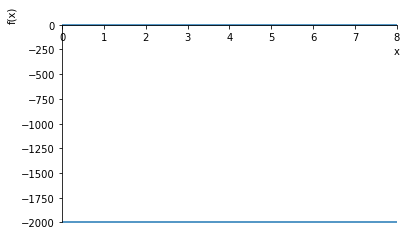

In [14]:
splot.plot((V_AD_N.subs(s_d), (x, 0, L_AD_m.subs(s_d))),
           (0.0, (x, 0, L_AD_m.subs(s_d))))

### 굽힘모멘트선도

In [15]:
M_AD_Nm = V_AD_N * x

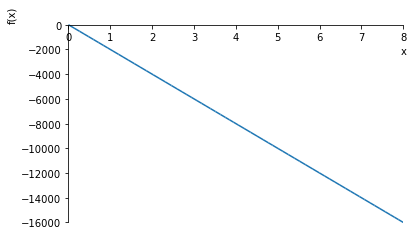

In [16]:
splot.plot(M_AD_Nm.subs(s_d), (x, 0, L_AD_m.subs(s_d)))

### 굽힘응력

#### B 지점

B 지점의 굽힘 모멘트

In [17]:
M_B_Nm = M_AD_Nm.subs(x, x_B_m)
M_B_Nm

A-B 구간 단면의 모멘트

In [18]:
I_AB_m4 = b_m * h_AB_m**3 / 12

윗 면으로부터 도심까지의 거리

In [19]:
c_AB_m = h_AB_m * 0.5

굽힘응력

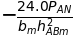

In [20]:
sigma_B_Nm = -M_B_Nm * c_AB_m / I_AB_m4
sigma_B_Nm

In [21]:
sigma_B_Nm.subs(s_d)

#### D 지점

D 지점의 굽힘 모멘트

In [22]:
M_D_Nm = M_AD_Nm.subs(x, x_D_m)
M_D_Nm

A-B 구간 단면의 모멘트

In [23]:
I_BD_m4 = b_m * h_BD_m**3 / 12

윗 면으로부터 도심까지의 거리

In [24]:
c_BD_m = h_BD_m * 0.5

굽힘응력

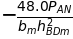

In [25]:
sigma_D_Nm = -M_D_Nm * c_BD_m / I_BD_m4
sigma_D_Nm

In [26]:
sigma_D_Nm.subs(s_d)

두 값을 비교해 본다. 0보다 크다면 B 지점의 응력이 더 크다.

In [27]:
abs(sigma_B_Nm.subs(s_d)) - abs(sigma_D_Nm.subs(s_d))

B 지점에서 응력이 최대이다.

In [28]:
sigma_B_Nm.subs(s_d)

#### x 에 따른 분포<br>Distribution on x

p. 170 eq. 5.4a, b

$$\sigma_{max}=\frac{|M|_{max}c}{I}=\frac{|M|_{max}}{S}$$

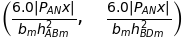

In [29]:
sigma_AB_Pa = abs(M_AD_Nm) * (h_AB_m * 0.5) / I_AB_m4
sigma_BD_Pa = abs(M_AD_Nm) * (h_BD_m * 0.5) / I_BD_m4
sigma_AB_Pa, sigma_BD_Pa

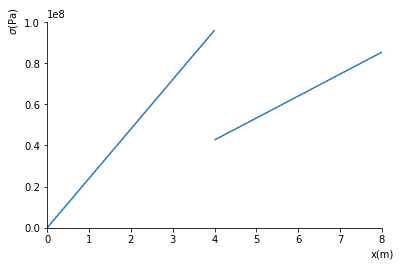

In [30]:
splot.plot((sigma_AB_Pa.subs(s_d), (x, 0, x_B_m)),
           (sigma_BD_Pa.subs(s_d), (x, x_B_m, x_D_m)),
          xlabel='x(m)', ylabel='$\sigma$(Pa)')

#### 굽힘응력의 분포<br>Distribuion of bending stress

##### `x` `y` 격자<br>`x` `y` grids

In [31]:
dx_m = 1e-3
dx_half_m = dx_m * 0.5

h_AB_half_m = s_d[h_AB_m] * 0.5
x_AB_m_array = np.arange(0, x_B_m + dx_half_m, dx_m)
y_AB_m_array = np.arange(-h_AB_half_m, h_AB_half_m + dx_half_m, dx_m)
y_AB_m_grid, x_AB_m_grid = np.meshgrid(y_AB_m_array, x_AB_m_array)

h_BD_half_m = s_d[h_BD_m] * 0.5
x_BD_m_array = np.arange(x_B_m, x_D_m + dx_half_m, dx_m)
y_BD_m_array = np.arange(-h_BD_half_m, h_BD_half_m + dx_half_m, dx_m)
y_BD_m_grid, x_BD_m_grid = np.meshgrid(y_BD_m_array, x_BD_m_array)

##### 모멘트 격자<br>Moment grids

In [32]:
func_M_AD_Nm = sy.lambdify(x, M_AD_Nm.subs(s_d))
M_AB_Nm_grid = func_M_AD_Nm(x_AB_m_grid)
M_BD_Nm_grid = func_M_AD_Nm(x_BD_m_grid)

##### 응력 격자<br>Stress grids

In [33]:
sigma_AB_Pa_grid = M_AB_Nm_grid * y_AB_m_grid / (-float(I_AB_m4.subs(s_d)))
sigma_BD_Pa_grid = M_BD_Nm_grid * y_BD_m_grid / (-float(I_BD_m4.subs(s_d)))

##### 굽힘응력의 분포<br>Distribution of bending stress

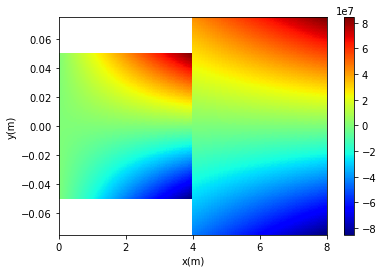

In [34]:
plt.pcolormesh(x_AB_m_grid, y_AB_m_grid, sigma_AB_Pa_grid, cmap='jet')
plt.pcolormesh(x_BD_m_grid, y_BD_m_grid, sigma_BD_Pa_grid, cmap='jet')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.colorbar()
plt.show()